In [11]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

First we load up the data. This data corresponds to the 1-5 + 5-1 degenerate eigenmode.

In [24]:
data_filename = '15_900_905_0.2.npy'
amplitude = np.load('data/'+data_filename)
summed_z = np.average(amplitude, 2)
print(data_filename)

15_900_905_0.2.npy


Here is the data without antialiasing:

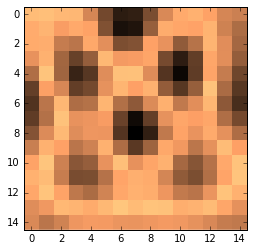

In [25]:
plt.imshow(summed_z, cmap='copper_r', interpolation='none')
plt.show()

Here is the data with antialising:

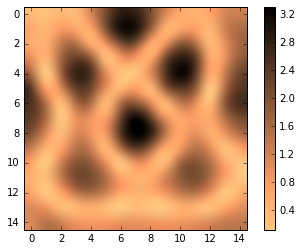

In [27]:
plt.imshow(summed_z, cmap='copper_r', interpolation='lanczos')
plt.colorbar()

We will always display our plots in this report in the antialiased form, as it is clearer. However, all analysis and calculations is done with the raw maps. 

Now, we generate a theoretical plot:

$f5(x)*f1(y)$ is 5-1. 

We have $f5(x)=0.583\cos(5 x) + 0.71429\cos(7 x)$, and $f1(x) = 0.75 (\cos(x) + 0.333\cos(3 x))$.

Here are the associated functions:

In [28]:
f1 = lambda x: 0.75*(np.cos(x) + 0.333*np.cos(3.*x))
f5 = lambda x: 0.583*np.cos(5.*x) + 0.71429*np.cos(7.*x)

Here is the range we are working over. Note that this range is approximate due to how well we know the sides of our plate:

In [29]:
steps_to_edge = 7950. #\pm 50
steps_taken_max = 5000. #(some data has 5000)
phase_at_edge = 1.0
phase_at_max = phase_at_edge*steps_taken_max/steps_to_edge
grid_size = 15
x_domain = np.linspace(-phase_at_edge, phase_at_edge, grid_size)
y_domain = np.copy(x_domain)

Now, we calculate the theoretical relative amplitude at each of these grid points:

In [30]:
five_one_theory_amplitude = np.dot(f5(x_domain)[:, None],f1(y_domain)[None])
one_five_theory_amplitude = np.dot(f1(x_domain)[:, None],f5(y_domain)[None])

Finally, here is the colormap of the 1-5+5-1 degenerate eigenmode, over our mapped region:

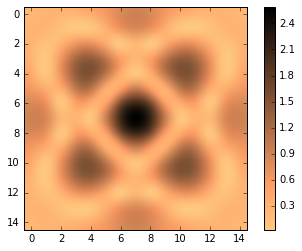

In [31]:
theoretical_mode = np.abs(one_five_theory_amplitude+five_one_theory_amplitude)
plt.imshow(theoretical_mode,
           cmap='copper_r', interpolation='lanczos')
plt.colorbar()

Here we find the indices of highest intensity - the ones that matter the most for our fit. We only pick the top percentile.

In [136]:
percentile = 0
high_indices = np.argwhere(theoretical_mode>=np.percentile(theoretical_mode, percentile))
left_indices = high_indices[:, 0]
right_indices = high_indices[:, 1]

In [140]:
fit = minimize(lambda a: np.sum(
        np.square((a*theoretical_mode[left_indices, right_indices] - \
                   summed_z[left_indices, right_indices])/\
                      (0.2*summed_z[left_indices, right_indices]))
        ),
        x0=[1], method='Nelder-Mead')
a = fit.x[0]
fit

  status: 0
    nfev: 26
 success: True
     fun: 2847.6999722322398
       x: array([ 0.84746094])
 message: 'Optimization terminated successfully.'
     nit: 13

Here we calculate and plot the residuals of this fit:

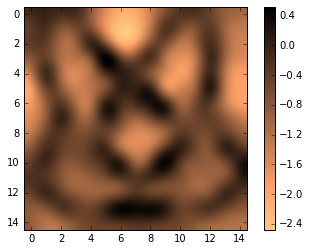

In [141]:
residuals = a*theoretical_mode-summed_z
plt.imshow(residuals, cmap='copper_r', interpolation='lanczos')
plt.colorbar()

In [142]:
reduced_chi_square = np.sum(np.square(residuals[left_indices, right_indices]/\
                                      (0.2*summed_z[left_indices, right_indices])))/(left_indices.size-1)
reduced_chi_square

12.712946304608213